## # EDA з використанням inspectdf

---

In [1]:
#install.packages("inspectdf")

# Встановлення та завантаження пакету inspectdf
Мені подобається цей пакет, тому що він має багато функціональних можливостей і є надзвичайно простим у використанні. Коротко кажучи, він дозволяє зрозуміти та візуалізувати типи стовпців, розміри, значення, дисбаланс значень і розподіли, а також кореляції. Крім того, він дозволяє дуже легко виконувати будь-яку з вищезазначених функцій для окремого датафрейму або порівнювати відмінності між двома датафреймами.

In [4]:
library(inspectdf)
library(tidyverse)

In [5]:
df= read_csv('https://raw.githubusercontent.com/lgellis/STEM/master/DATA-ART-1/Data/FinalData.csv', col_names = TRUE)

Rows: 185 Columns: 17
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (11): Gender, Horoscope, Subject, IntExt, OptPest, SpendTime1, SpendTime...
dbl  (6): ID, Grade, ScreenTime, Sleep, PhysActive, HrsHomework

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
head(df, 10)

ID,Gender,Grade,Horoscope,Subject,IntExt,OptPest,ScreenTime,Sleep,PhysActive,HrsHomework,SpendTime1,SpendTime2,Self1,Self2,Career,Superpower
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,male,4,Scorpio,Math,Extravert,Optimist,1,7,10,10,baseball,relaxing,active,competitive,professional baseball player,sonic speed
2,female,4,Capricorn,Gym,Extravert,Optimist,1,8,5,0,playing outside,swimming,kind,active,Teacher,power to grant wishes
3,male,4,Taurus,Math,Introvert,Optimist,4,9,22,1,video games,soccer,active,creative,professional soccer player,powerful kick
4,male,4,Aquarius,Math,Don't Know,Don't Know,3,9,9,1,video games,sports,active,responsible,professional hockey player,teleportaion
5,male,4,Scorpio,Gym,Don't Know,Don't Know,1,9,10,1,reading,hanging out,intellegent,strong,engineer,power to answer any question
6,male,4,Pisces,Gym,Extravert,Optimist,2,9,20,2,sports,playing with friends,funny,active,professional hockey player,fly
7,male,3,Scorpio,Art,Introvert,Optimist,1,11,4,14,watching TV,reading,joyful,lazy,artist,telekinesis
8,male,6,Taurus,Math,Extravert,Optimist,4,9,12,21,video games,playing outside,fun,confident,banker,teleportation
9,male,6,Aries,Gym,Introvert,Pessimist,6,8,4,6,video games,biking,sad,calm,computer scientist,materialize anything


In [10]:
dim(df)

[1] 185  17

# Створення необхідних датафреймів

Нам потрібні три датафрейми. Нам потрібен один датафрейм з повним набором даних. Ми просто перейменовуємо df на allGrades. Нам також потрібні два піднабори даних, щоб використовувати прості функції порівняння датафреймів пакету. Ми створюємо датафрейми oldGrades (6-8) та youngGrades (3-5).

In [11]:
allGrades <- df

oldGrades <- allGrades %>% 
  filter(Grade > 5)

youngGrades <- allGrades %>% 
  filter(Grade < 6)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


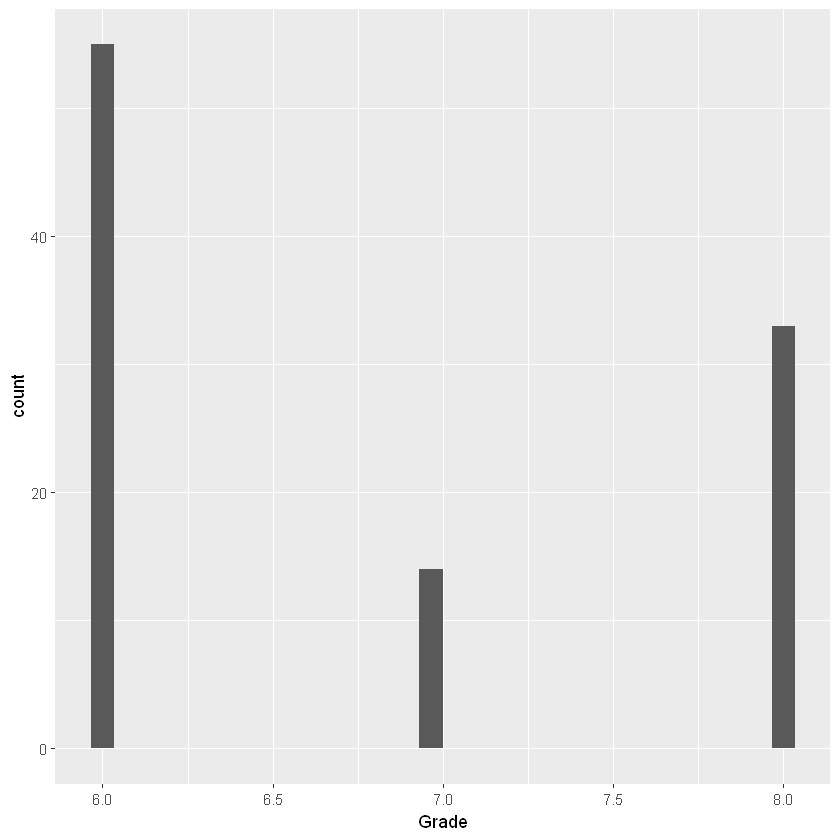

In [12]:
ggplot(oldGrades, aes(x=Grade)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


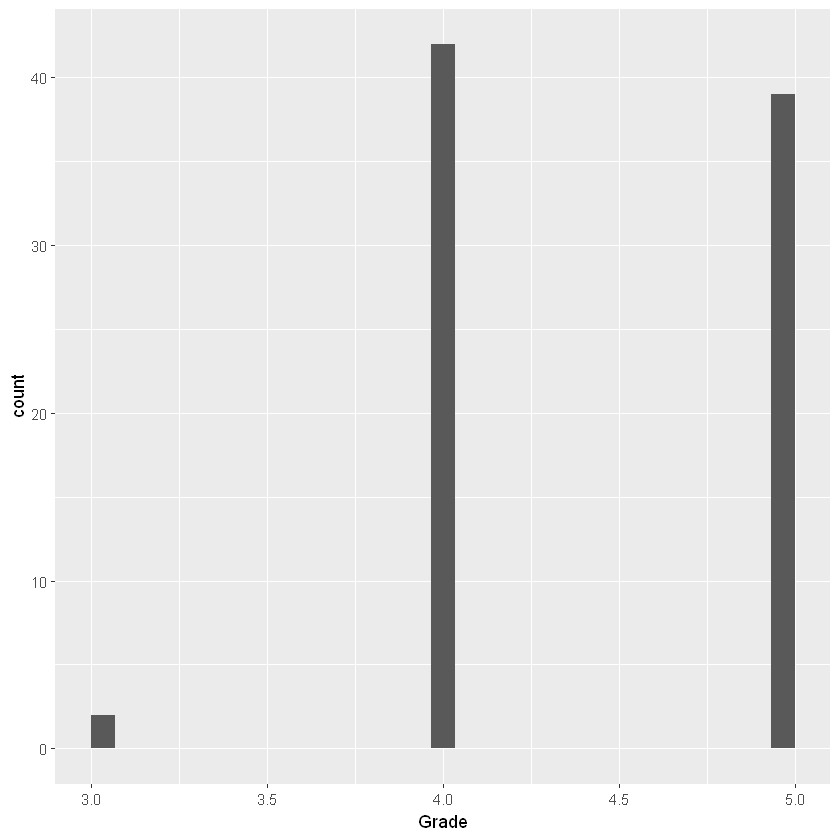

In [14]:
ggplot(youngGrades, aes(x=Grade)) + geom_histogram()

# Виконання функцій пакету inspectdf

Просто передайте датафрейм або два (для порівняння) і встановіть show_plot = TRUE. Вихідні дані включатимуть як tibble з сирими даними, так і візуалізацію.

## 1 Оцінка типів стовпців датафрейму за допомогою функції inspect_types()

### a) Оцінка повного датафрейму: allGrades

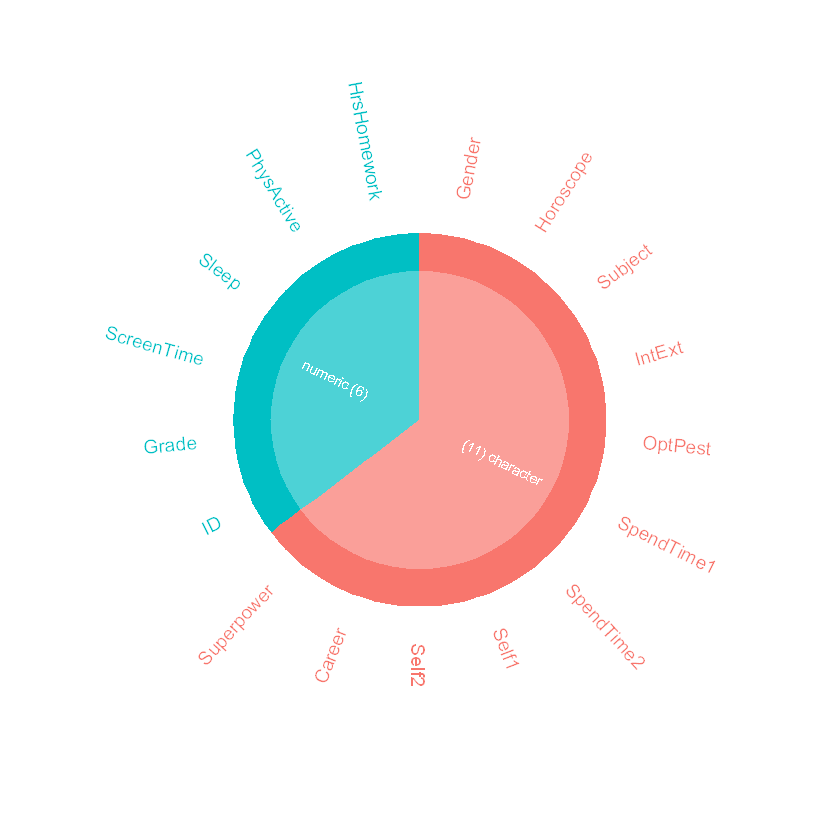

In [17]:
inspect_types(allGrades) %>% show_plot()

### b) Порівняння між youngGrades та oldGrades

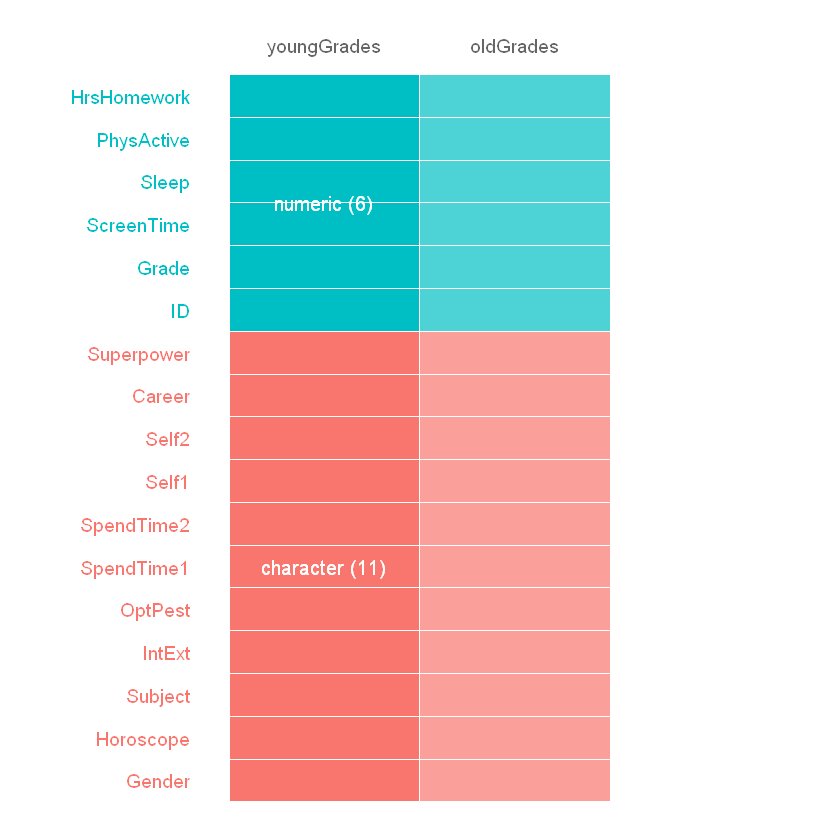

In [18]:
inspect_types(youngGrades, oldGrades) %>% show_plot()

## 2 Оцінка використання пам'яті стовпцями датафрейму за допомогою функції inspect_mem()

### a) Оцінка повного датафрейму: allGrades

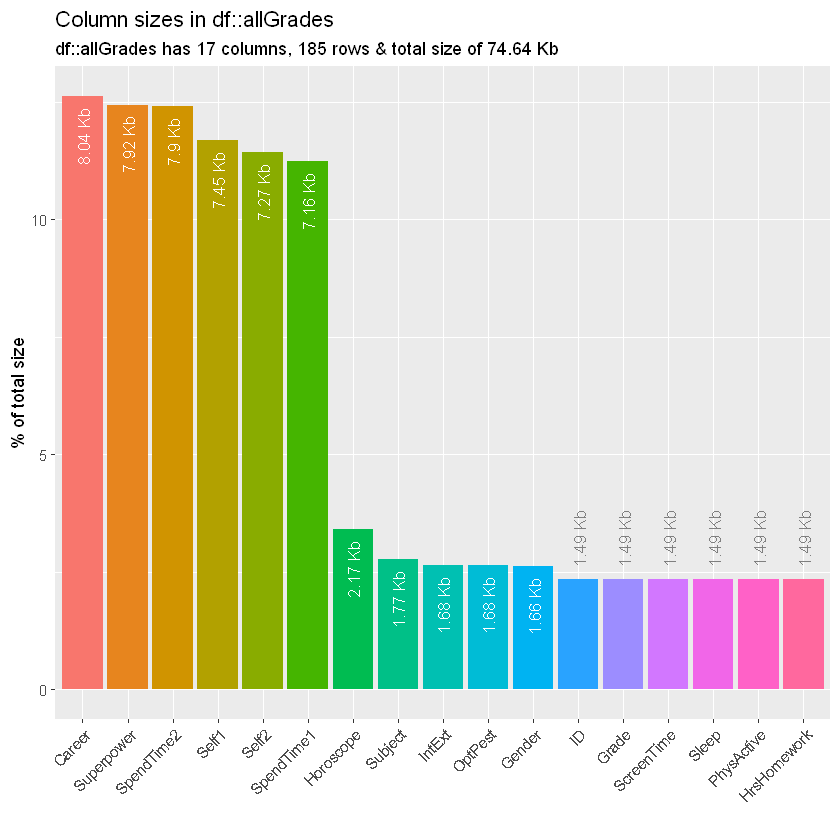

In [21]:
inspect_mem(allGrades) %>% show_plot()

### b) Порівняння між youngGrades та oldGrades

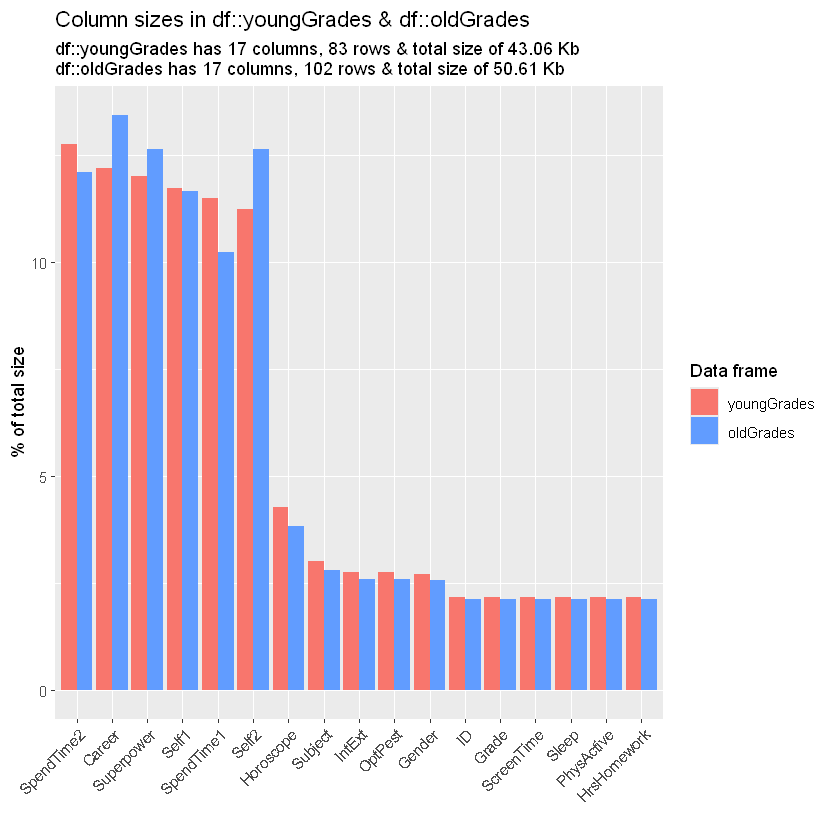

In [22]:
inspect_mem(youngGrades, oldGrades) %>% show_plot()

## 3 Оцінка поширеності NA в датафреймі за допомогою функції inspect_na()

### a) Оцінка повного датафрейму: allGrades

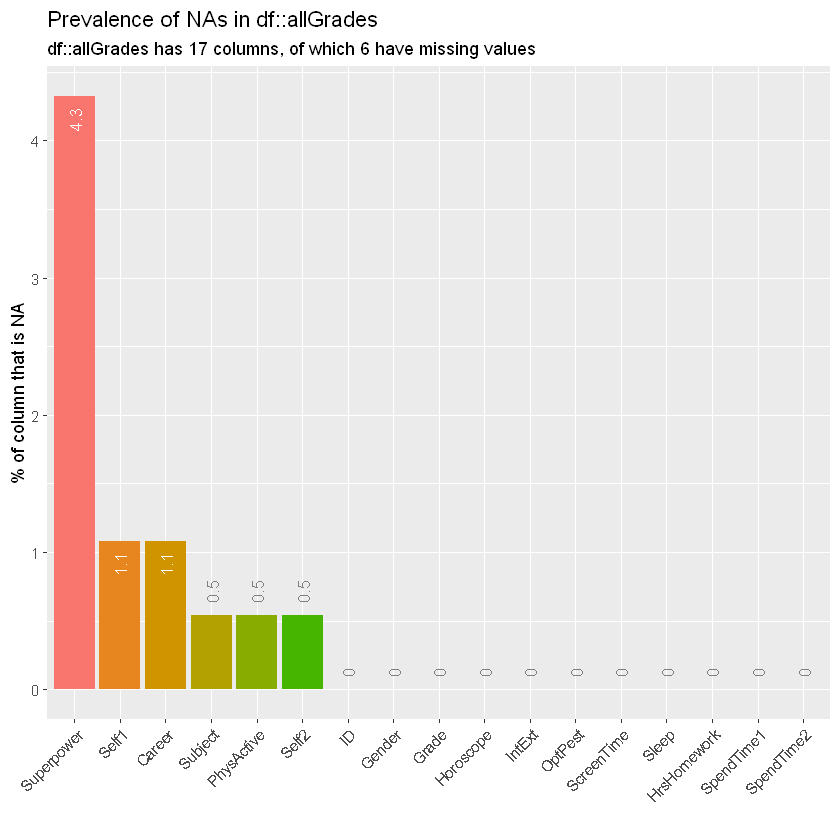

In [25]:
inspect_na(allGrades) %>% show_plot()

### b) Порівняння між youngGrades та oldGrades

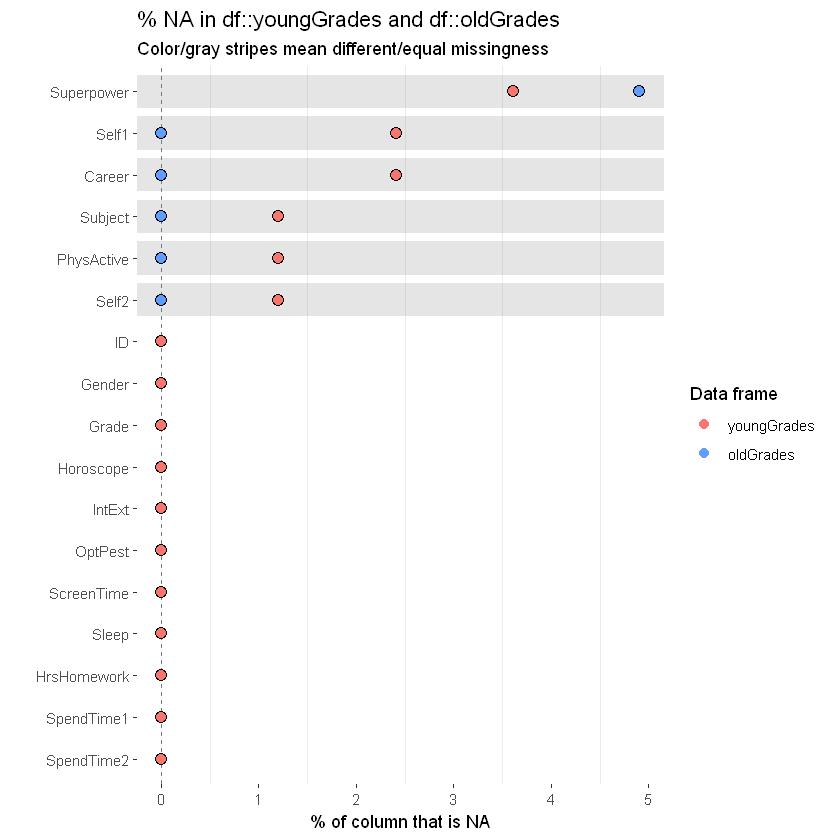

In [28]:
inspect_na(youngGrades, oldGrades) %>% show_plot()

## 4 Оцінка розподілу числових стовпців за допомогою функції inspect_num()

### a) Оцінка повного датафрейму: allGrades

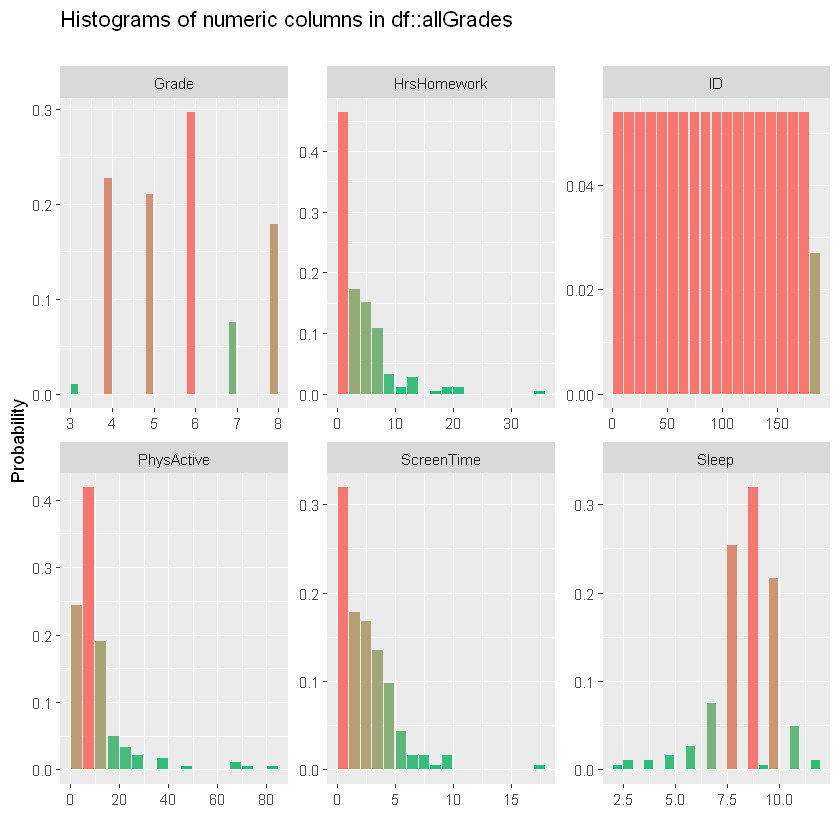

In [30]:
inspect_num(allGrades) %>% show_plot()

### b) Порівняння між youngGrades та oldGrades

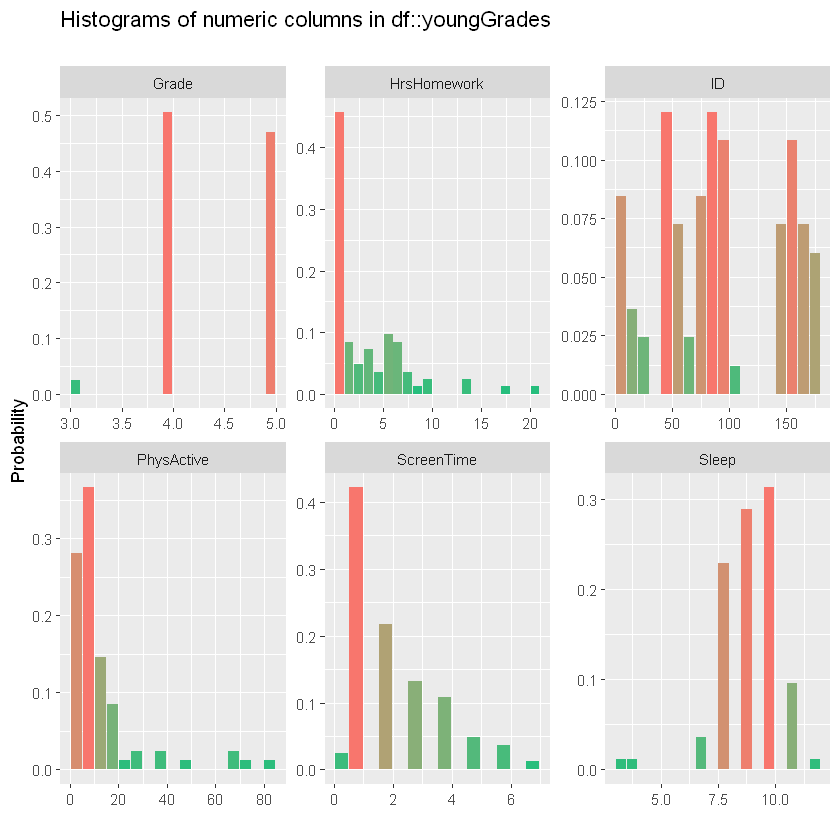

In [33]:
inspect_num(youngGrades) %>% show_plot()

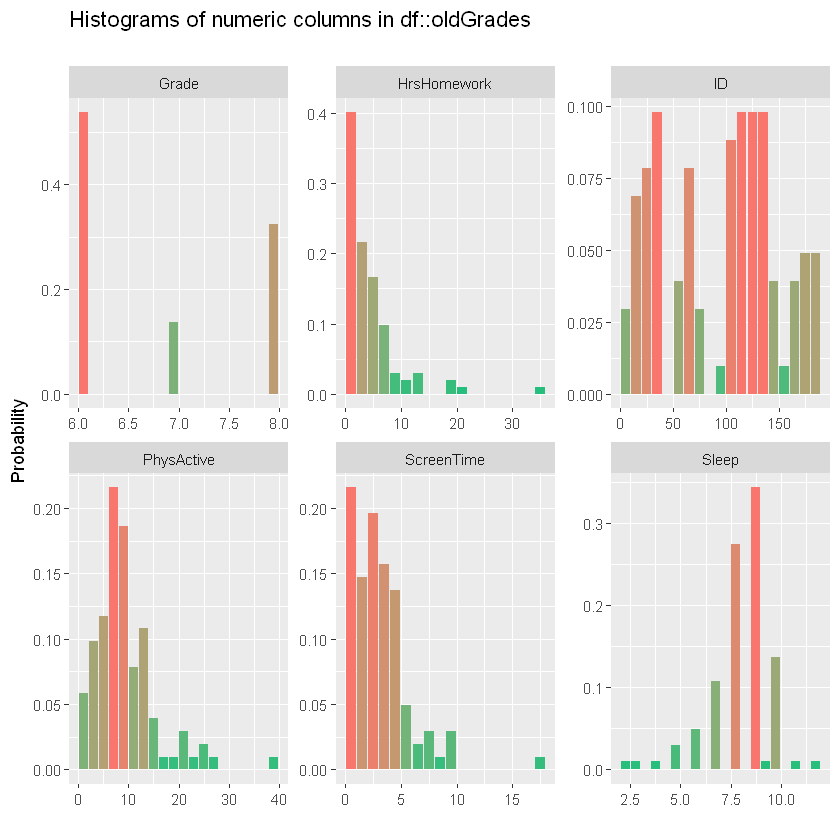

In [35]:
inspect_num(oldGrades) %>% show_plot()

## 5 Оцінка можливого дисбалансу категоріальних стовпців за допомогою функції inspect_imb() для виявлення факторів, які можуть бути надмірно поширеними.

### a) Оцінка повного датафрейму: allGrades

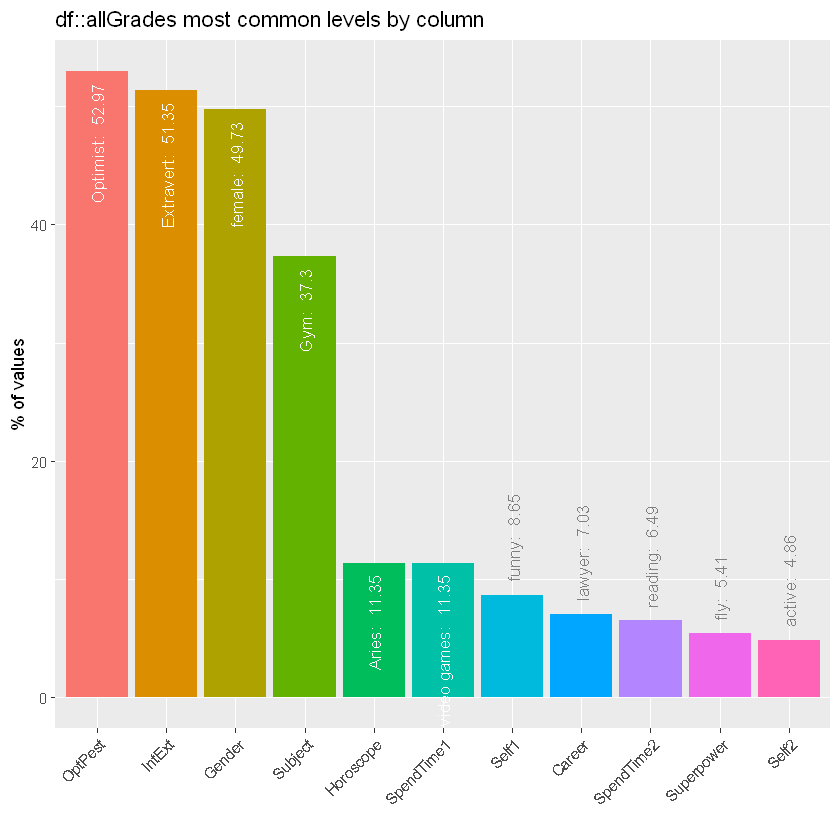

In [37]:
inspect_imb(allGrades) %>% show_plot()

### b) Порівняння між youngGrades та oldGrades

### b) Порівняння між youngGrades та oldGrades

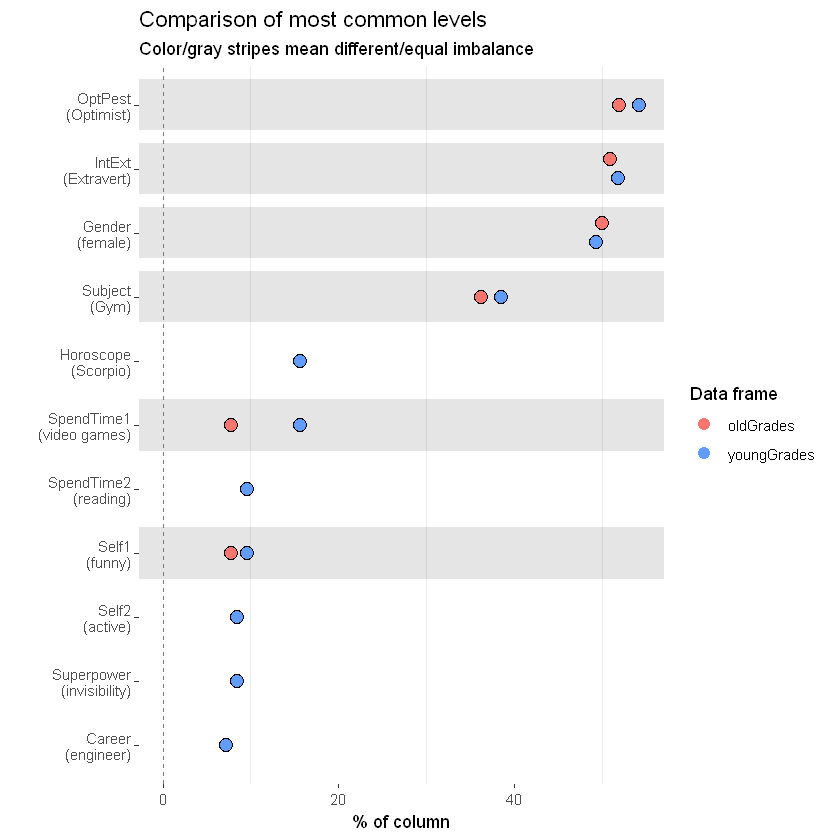

In [39]:
inspect_imb(youngGrades, oldGrades) %>% show_plot()

## 6 Оцінка розподілу категоріальних стовпців за допомогою функції inspect_cat()

### a) Оцінка повного датафрейму: allGrades

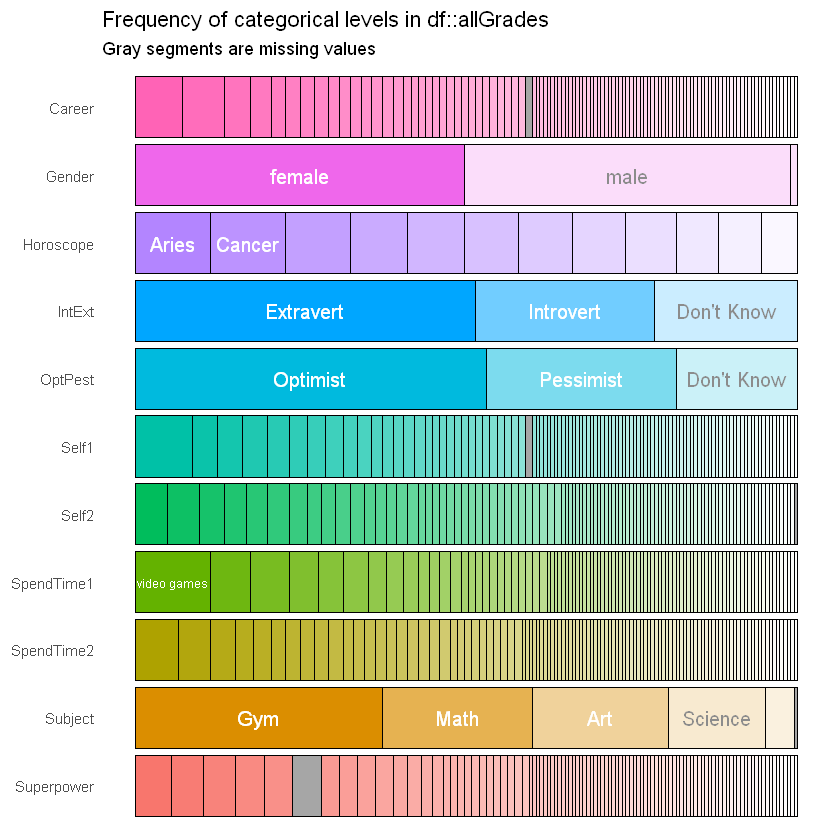

In [42]:
inspect_cat(allGrades) %>% show_plot()

### b) Порівняння між youngGrades та oldGrades

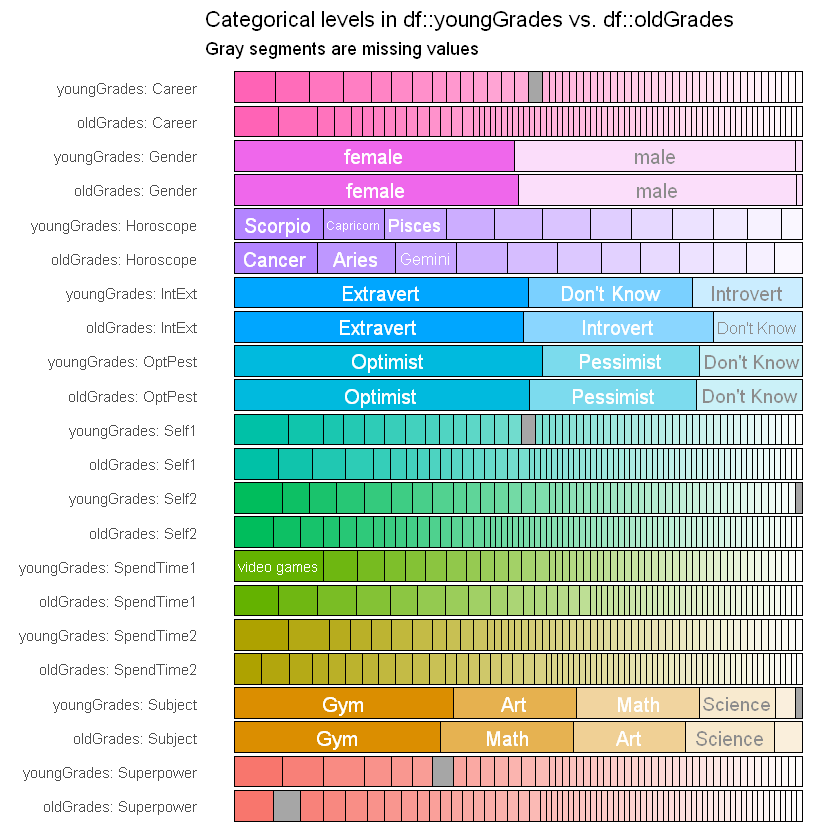

In [43]:
inspect_cat(youngGrades, oldGrades) %>% show_plot()

## 7 Evaluate the## 7 Оцінка кореляцій між стовпцями за допомогою функції inspect_cor()

### a) Оцінка повного датафрейму: allGrade

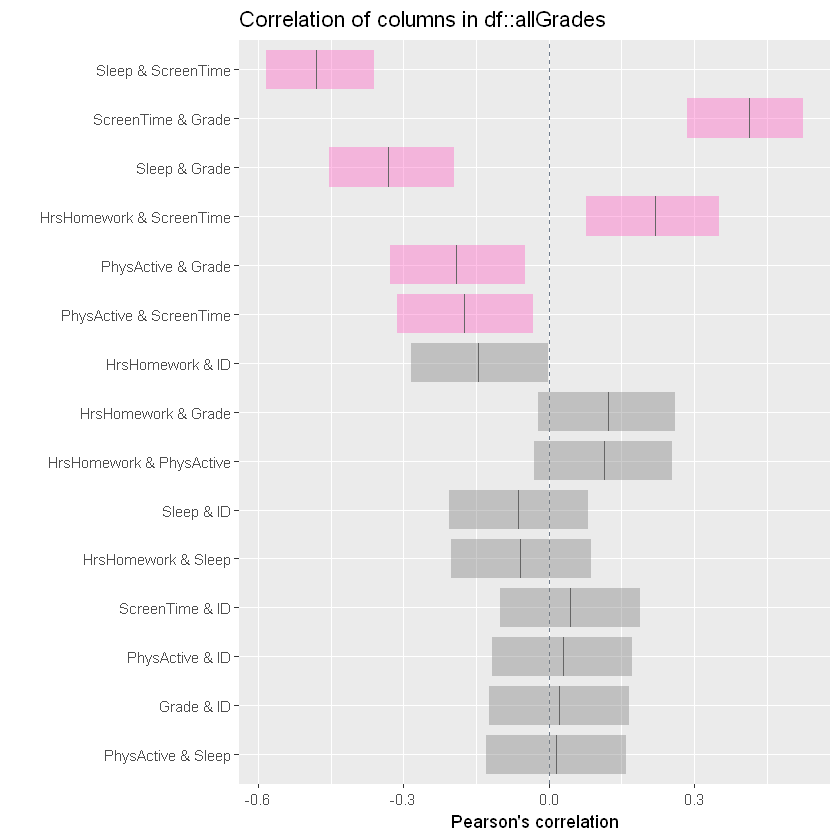

In [47]:
inspect_cor(allGrades) %>% show_plot()

### b) Порівняння між youngGrades та oldGrades

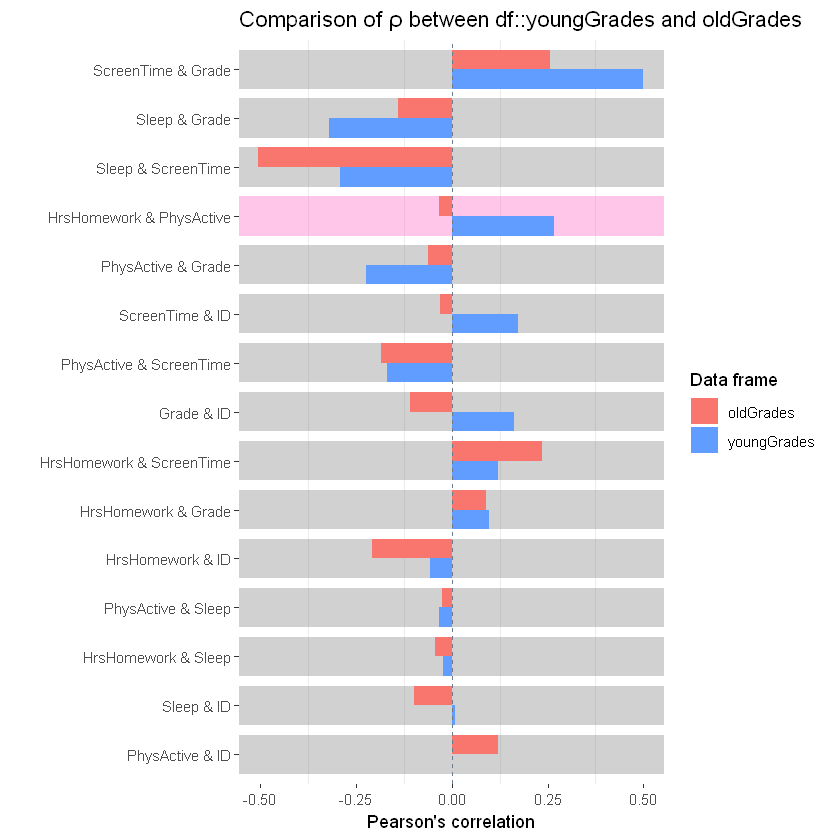

In [46]:
inspect_cor(youngGrades, oldGrades) %>% show_plot()